In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import mpl_toolkits.mplot3d

In [2]:
def sort_data(df):
    df_result = pd.DataFrame(columns=['Type', 'FD_Algorithm', 'Nodes_Number', 'Degree', 'CCL_Grana_Time', 'CCL_Wu_Time','CT_Time'])
    for filename in df['ccl_grana_filename']:
        new_name = filename.replace("..\\ccl_data\\jpg_files\\","")
        name_list = new_name.split('\\')
        prop_list = name_list[2].split('=')
        node_number = int(prop_list[1].replace('d',''))
        degree = int(prop_list[2].split("_")[0])
        ccl_grana = int(df.loc[df['ccl_grana_filename'] == filename, 'ccl_grana_processing_time(ms)'].values[0])*0.001
        ccl_wu = int(df.loc[df['ccl_grana_filename'] == filename, 'ccl_wu_processing_time(ms)'].values[0])*0.001
        ct = int(df.loc[df['ccl_grana_filename'] == filename, 'findContours_processing_time(ms)'].values[0])*0.001
        df_result.loc[len(df_result.index)] = [name_list[0], name_list[1], node_number, degree, ccl_grana, ccl_wu, ct]
    return df_result


# 生成x轴nodes_number的数据

In [11]:
# def draw_3d_bar(_type, d, n, fd, grana, wu, ct):
def draw_3d_bar():
    target_path = "..//Excel2Graph//3dbar" # 存储路径
    nodes_number_value = [500, 1000, 2000, 3000]
    degree_value = [6, 8, 10, 12, 15]
    x = np.random.randint(0,40,10)
    y = np.random.randint(0,40,10)
    z = 80 * abs(np.sin(x+y))
    for xx in nodes_number_value:
        for yy in degree_value:
            for zz in z:
#                 fig=plt.figure()
#                 ax=fig.gca(projection='3d')#三维坐标轴
                ax = plt.subplot(projection='3d')  # 三维图形
                color = np.random.random(3)   # 随机颜色元祖
                ax.bar3d(
                    xx,            # 每个柱的x坐标
                    yy,            # 每个柱的y坐标
                    0,             # 每个柱的起始坐标
                    dx=1,          # x方向的宽度
                    dy=1,          # y方向的厚度
                    dz=zz,         # z方向的高度
                    color=color)   #每个柱的颜色
                ax.set_xlabel('N')
                ax.set_ylabel('D')
                ax.set_zlabel('Processing Time(s)')
                plt.show()


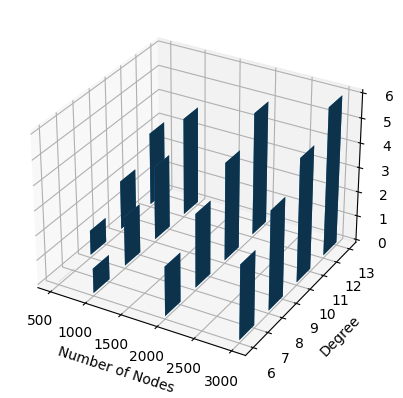

In [20]:
from mpl_toolkits.mplot3d import Axes3D

target_path = "..//Excel2Graph//3dbar" # 存储路径
nodes_number_value = [500, 1000, 2000, 3000]
degree_value = [6, 8, 10, 12]

#构造需要显示的值
X=nodes_number_value
Y=degree_value
#设置每一个（X，Y）坐标所对应的Z轴的值，在这边Z（X，Y）=X+Y
Z=np.zeros(shape=(4, 4))
for i in range(4):
    for j in range(4):
        Z[i, j]=i+j
 
xx, yy=np.meshgrid(X, Y)#网格化坐标
X, Y=xx.ravel(), yy.ravel()#矩阵扁平化
bottom=np.zeros_like(X)#设置柱状图的底端位值
Z=Z.ravel()#扁平化矩阵
 
width=height=1#每一个柱子的长和宽
 
#绘图设置
fig=plt.figure()
ax = plt.subplot(projection='3d')  # 三维图形
ax.bar3d(X, Y, bottom, width, height, Z, shade=True)#
#坐标轴设置
ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Degree')
ax.set_zlabel('Processing Time(s)')
plt.show()


In [14]:
z

array([79.34230828, 61.46037291, 79.99921652, 61.46037291, 76.91179935,
       21.67246306, 79.99294881,  1.41615401, 51.48305067, 61.46037291])

In [3]:
def draw_bar(_type, d, fd, grana, wu, ct, size=4, total_width=0.6, n=2):
    target_path = "..//Excel2Graph//bar"
    nodes_number_value = [500, 1000, 2000, 3000]
    x=np.arange(4)#柱状图在横坐标上的位置
    width = total_width / n
    x = x - (total_width - width) / 2
    fname = "Type="+_type+"_d="+str(d)+"_FD="+fd+".pdf"
    plt.bar(x, grana,  width=width, label='CCL_Grana')
    plt.bar(x+width, wu, width=width, label='CCL_Wu')
    plt.bar(x+width*2, ct, width=width, label='CT')
    plt.legend()
    plt.xticks(x+total_width/2,nodes_number_value)#显示x坐标轴的标签,即tick_label,调整位置，使其落在两个直方图中间位置
    plt.title("Type="+_type+", degree="+str(d)+", FD algorithm="+fd)
    plt.ylabel('Processing Time(s)')
    plt.xlabel('Number of Nodes')
#     plt.savefig(os.path.join(target_path, fname),bbox_inches ="tight", pad_inches = 1,transparent = True) 
    plt.savefig(os.path.join(target_path, fname),bbox_inches ="tight") 
    plt.show()

In [4]:
def time_bar_generate(sorted_df, _type, degree, FD_list):
    nodes_number_list = [500, 1000, 2000, 3000]
#     FD_list = ["DH","FA2","FDGE","FR","FRR","FRU","JIGGLE","KK","KK_W","LINLOG"]
    for fd in FD_list:
        print(fd)
        ccl_grana_list = []
        ccl_wu_list = []
        ct_list = []
        for number in nodes_number_list:
            ccl_grana_list.append(sorted_df.loc[(sorted_df['FD_Algorithm'] == fd) & (sorted_df['Degree'] == degree) & (sorted_df['Nodes_Number'] == number) & (sorted_df['Type'] == _type), 'CCL_Grana_Time'].values[0])
            ccl_wu_list.append(sorted_df.loc[(sorted_df['FD_Algorithm'] == fd) & (sorted_df['Degree'] == degree) & (sorted_df['Nodes_Number'] == number) & (sorted_df['Type'] == _type), 'CCL_Wu_Time'].values[0])
            ct_list.append(sorted_df.loc[(sorted_df['FD_Algorithm'] == fd) & (sorted_df['Degree'] == degree) & (sorted_df['Nodes_Number'] == number) & (sorted_df['Type'] == _type), 'CT_Time'].values[0])
        print(ccl_grana_list)
        draw_bar(_type, degree, fd, ccl_grana_list, ccl_wu_list, ct_list)

# 1. 生成x轴为nodes_number，y轴为degree，z轴为运行时间的柱状图

DH
[62.142, 156.102, 455.914, 1151.323]


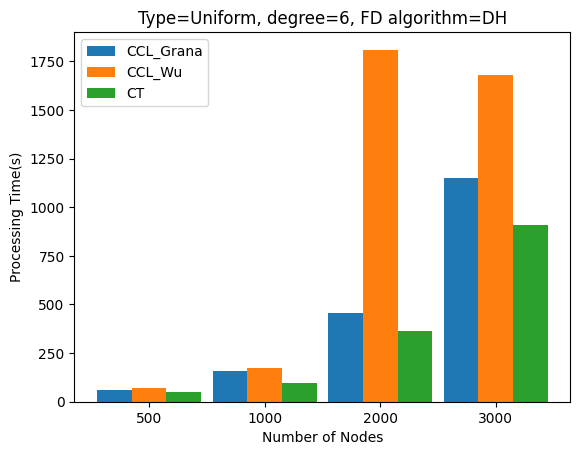

FA2
[69.393, 178.64600000000002, 598.668, 1344.4080000000001]


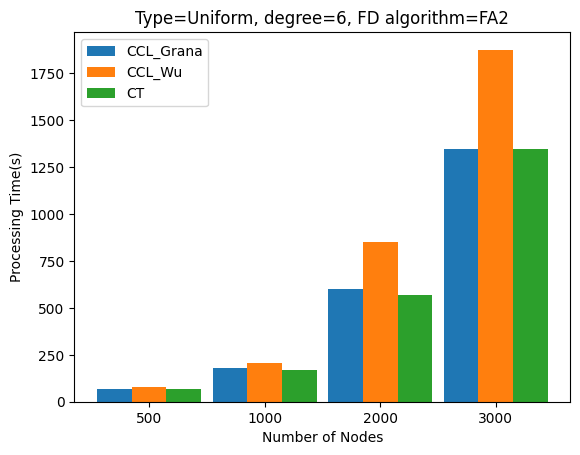

FDGE
[84.889, 210.983, 814.291, 1772.8220000000001]


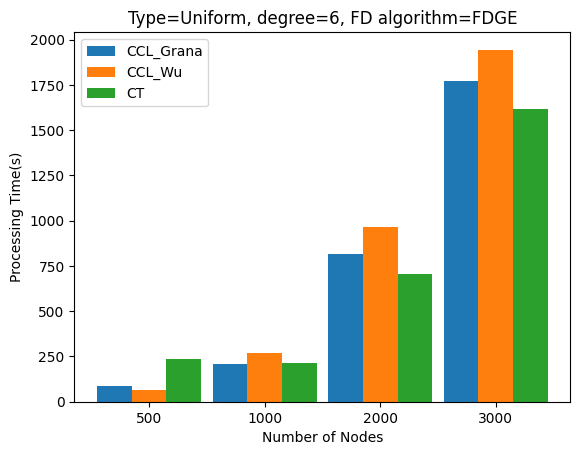

FR
[139.123, 178.59, 639.681, 1596.068]


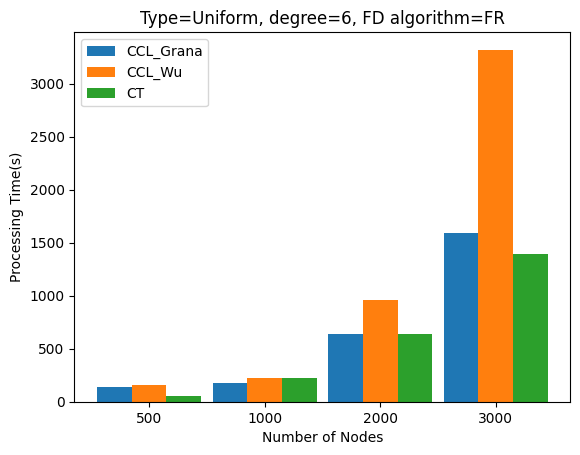

FRU
[64.257, 192.757, 538.625, 1388.022]


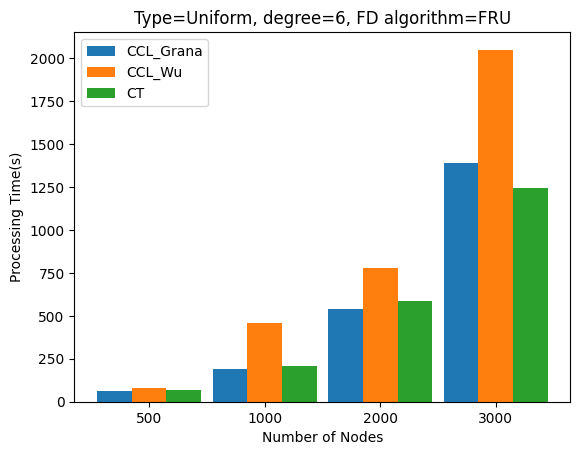

JIGGLE
[51.01, 167.726, 804.644, 1459.816]


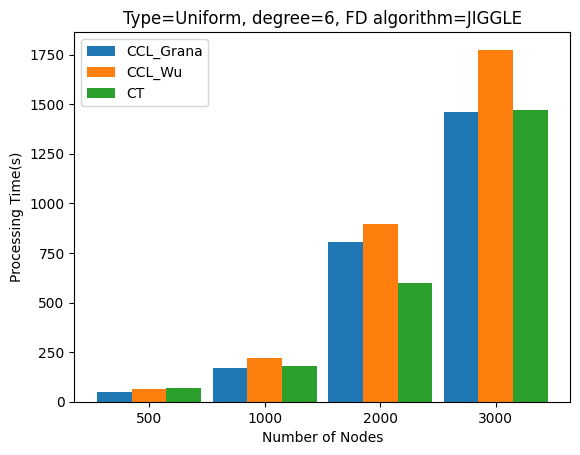

KK
[68.84100000000001, 232.595, 561.532, 1041.323]


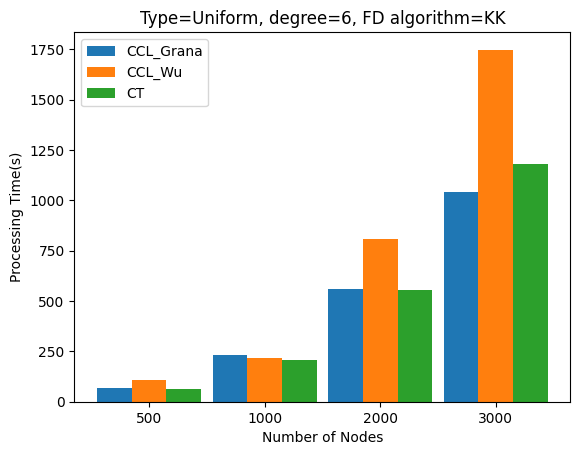

KK_W
[66.182, 194.805, 856.118, 1410.042]


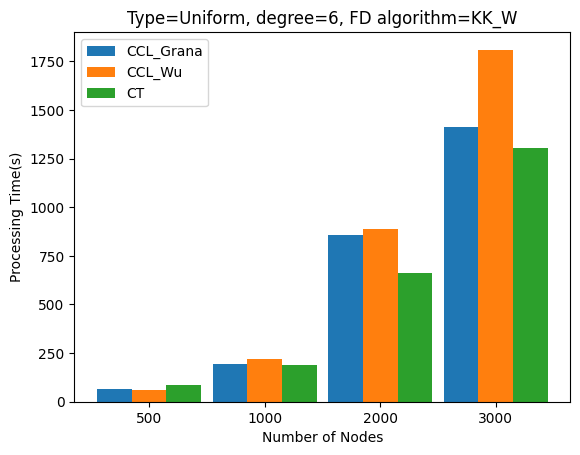

In [8]:
source_path = "../../Time"
file_name = "time.csv"
df = pd.read_csv(os.path.join(source_path, file_name))
# FD_list = ["DH","FA2","FRU"]
FD_list = ["DH","FA2","FDGE","FR","FRU","JIGGLE","KK","KK_W"]

sorted_df = sort_data(df)
time_bar_generate(sorted_df, "Uniform", 6, FD_list)
